# Lista 3 - Visão Computacional
Juliana Carvalho de Souza

## Questão 1

In [1]:
# import open cv
import cv2
import numpy as np
import matplotlib.pyplot as plt


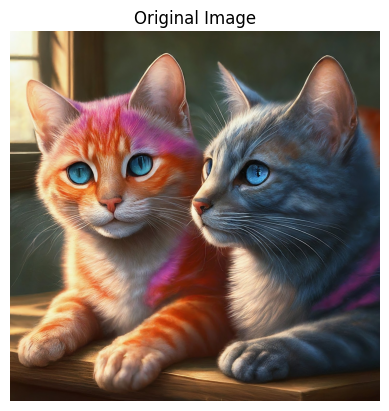

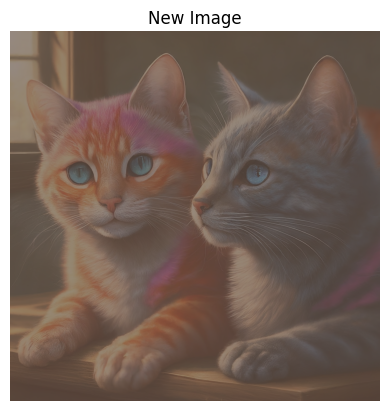

In [45]:
mycats = cv2.imread("cats.jpg")
cats_rgb = cv2.cvtColor(mycats, cv2.COLOR_BGR2RGB).astype(float)
img_cats = cats_rgb / 255


def change_brightness_contrast(img, beta = None, kappa = None):
    new_img = img
    if beta is not None:
        new_img = img + beta
    if kappa is not None:
        mean = np.mean(img, axis=(0,1))
        new_img = (img - mean) * kappa + mean
    return new_img

beta = 0.9
kappa = 0.3
new_img = change_brightness_contrast(img_cats, beta, kappa)
plt.figure()
plt.imshow(img_cats)
plt.title("Original Image")
plt.axis('off')
plt.show()

plt.figure()
plt.imshow(new_img)
plt.title("New Image")
plt.axis('off')
plt.show()


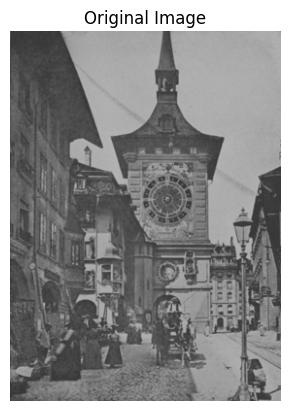

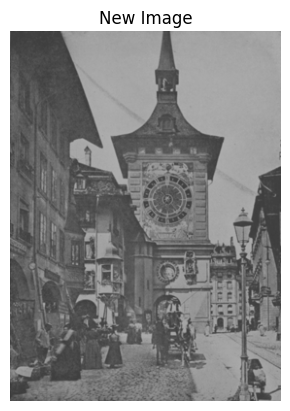

In [40]:
img_pouco_contraste = cv2.imread("PoucoContraste.png")
img_pouco_contraste = cv2.cvtColor(img_pouco_contraste, cv2.COLOR_BGR2RGB).astype(float)
img_pouco_contraste = img_pouco_contraste / 255

beta = -0.5
kappa = 0.9
new_img = change_brightness_contrast(img_pouco_contraste, beta, kappa)
plt.figure()
plt.imshow(img_pouco_contraste)
plt.title("Original Image")
plt.axis('off')
plt.show()

plt.figure()
plt.imshow(new_img)
plt.title("New Image")
plt.axis('off')
plt.show()


## Questão 2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


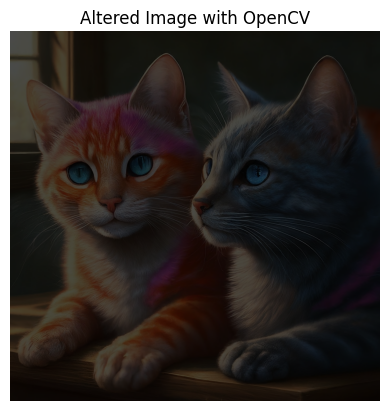

In [3]:
plt.imshow(cats_rgb)
img_altered_cv = cv2.convertScaleAbs(cats_rgb, alpha=kappa, beta=beta)
plt.imshow(img_altered_cv)
plt.title("Altered Image with OpenCV")
plt.axis('off')
plt.show()



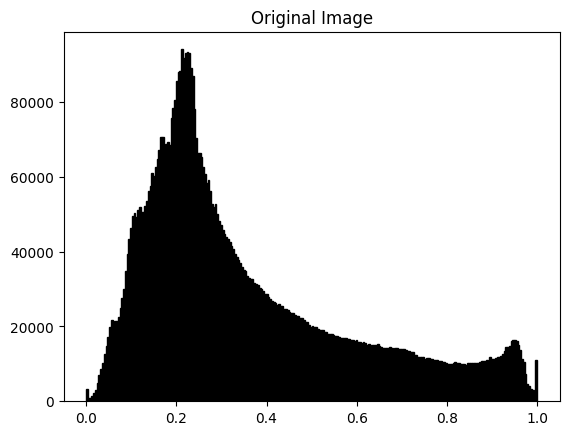

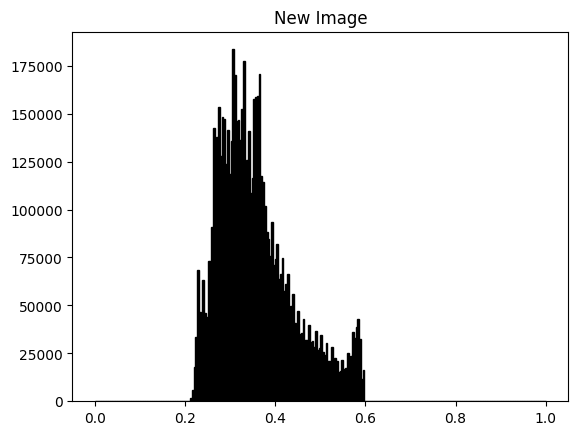

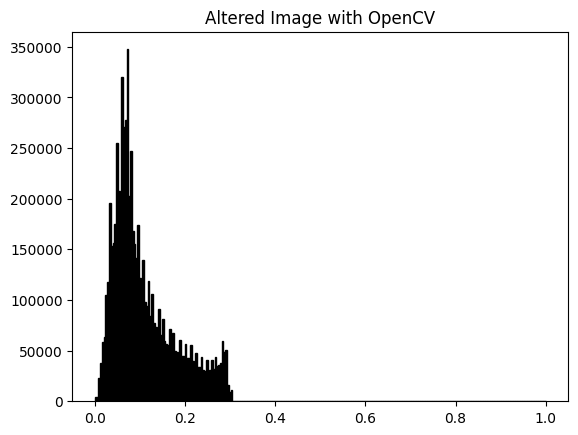

In [5]:
def plot_histogram(img, title):
    plt.figure()
    plt.hist(img.ravel(), bins=256, range=(0, 1), fc='k', ec='k')
    plt.title(title)
    plt.show()

plot_histogram(img_cats, "Original Image")
plot_histogram(new_img, "New Image")
# As the cv2.convertScalAbs do not use pixels in [0,1] range, we need to divide by 255
plot_histogram(img_altered_cv/255, "Altered Image with OpenCV")


### Comentários:
- A minha função aparenta realizar algo similar ao OpenCV, pois a curva tem um formato similar. Entretanto, há um deslocamento da média da curva que implementei conforme as instruções do enunciado, em relação ao opencv.

## 3 - Filtros

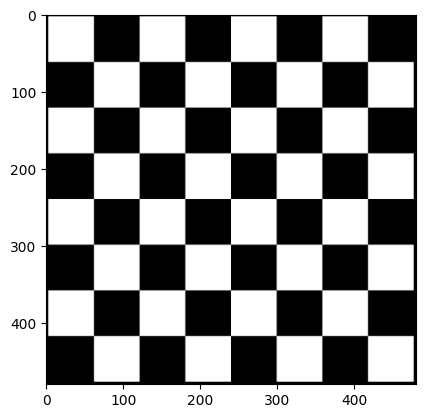

In [46]:
img_tabuleiro = cv2.imread("Chess_Board.svg.png")
img_tabuleiro_rgb = cv2.cvtColor(img_tabuleiro, cv2.COLOR_BGR2RGB)
img_tabuleiro_rgb = img_tabuleiro_rgb / 255
plt.imshow(img_tabuleiro_rgb)

def gaussian_kernel(size, mean=0, std=2):
    kernel = np.fromfunction(lambda x, y: (1/(2*np.pi*std**2)) * np.exp(-((x - size//2)**2 + (y - size//2)**2)/(2*std**2)), (size, size))
    return kernel / np.sum(kernel)

CONSTANT_FILTER_3X3 = np.array([[1, 1, 1],
                                [1, 1, 1],
                                [1, 1, 1]]) / 9
DERIVATIVE_FILTER_HORIZONTAL = np.array([[-1, 0, 1]])
DERIVATIVE_FILTER_VERTICAL = np.array([[-1], [0], [1]])
SOBEL_FILTER_HORIZONTAL = np.array([[1, 0, -1],
                                    [2, 0, -2],
                                    [1, 0, -1]])
SOBEL_FILTER_VERTICAL = np.array([[1, 2, 1],
                                    [0, 0, 0],
                                    [-1, -2, -1]])

GAUSSIAN_FILTR_5X5_MEAN_0_STD_2 = gaussian_kernel(5, 0, 2)

filters = [CONSTANT_FILTER_3X3, DERIVATIVE_FILTER_HORIZONTAL, DERIVATIVE_FILTER_VERTICAL, 
           SOBEL_FILTER_HORIZONTAL, SOBEL_FILTER_VERTICAL, GAUSSIAN_FILTR_5X5_MEAN_0_STD_2]

filters_names = ["CONSTANT_FILTER_3X3", "DERIVATIVE_FILTER_HORIZONTAL", "DERIVATIVE_FILTER_VERTICAL", 
                 "SOBEL_FILTER_HORIZONTAL", "SOBEL_FILTER_VERTICAL", "GAUSSIAN_FILTR_5X5_MEAN_0_STD_2"]



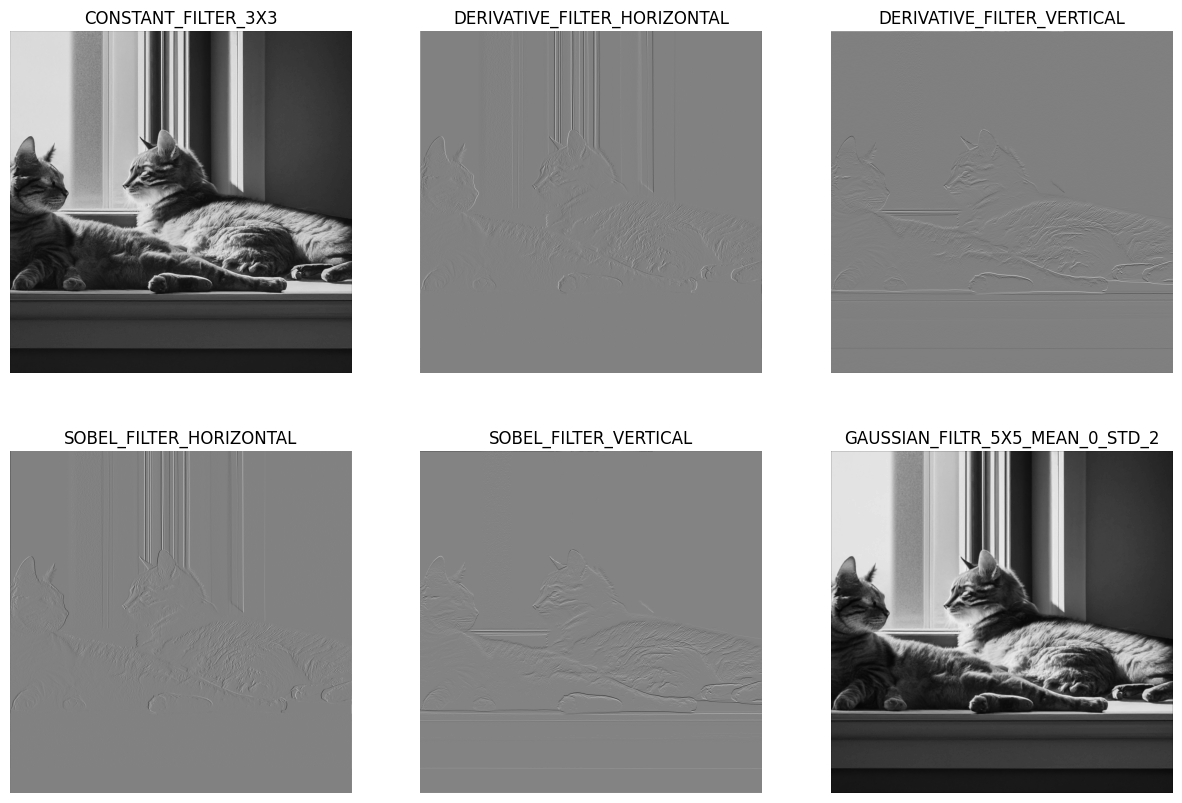

In [47]:
def apply_filter(image, filter):
    width, height = image.shape
    kx = filter.shape[0] // 2
    ky = filter.shape[1] // 2
    new_image = np.zeros((width, height))
    image = np.pad(image, [(kx, ), (ky, )], mode='constant')
    for x in range(width):
        for y in range(height):
            image_slice = image[x:x + 2 * kx + 1, y:y + ky * 2 + 1]
            new_value = np.multiply(image_slice, filter).sum()
            new_image[x, y] = new_value
    return new_image

def apply_filters(image, filters):
    new_images = []
    for filter in filters:
        new_image = apply_filter(image, filter)
        new_images.append(new_image)
    return new_images

def plot_images(images, titles):
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    for i, ax in enumerate(axs.flat):
        ax.imshow(images[i], cmap='gray')
        ax.set_title(titles[i])
        ax.axis('off')
    plt.show()

cat_image = cv2.imread("black_white_cats.jpg", cv2.IMREAD_GRAYSCALE).astype(float)

images = apply_filters(cat_image, filters)
plot_images(images, filters_names)




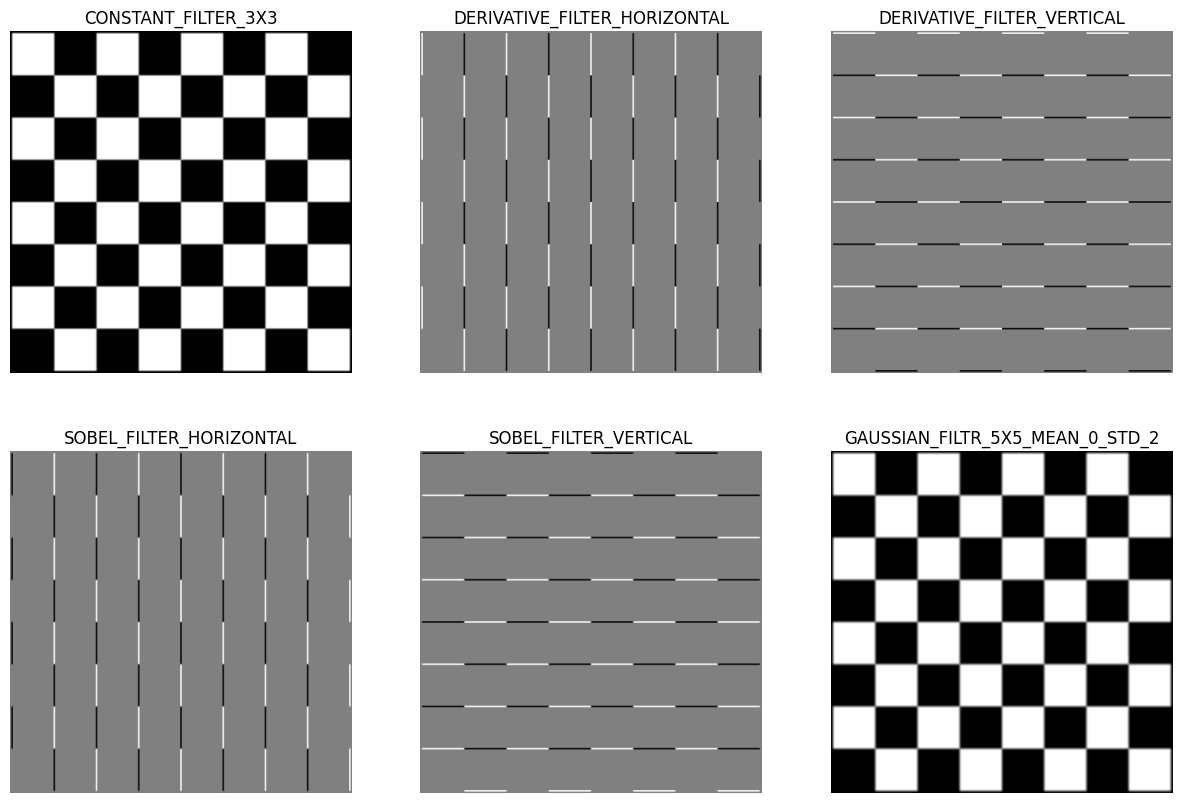

In [48]:
chess_image = cv2.imread("Chess_Board.svg.png", cv2.IMREAD_GRAYSCALE).astype(float)
images_chess = apply_filters(chess_image, filters)
plot_images(images_chess, filters_names)

### 4 - Redução de dimensão

### 1- without suavization, just cutting lines and columns


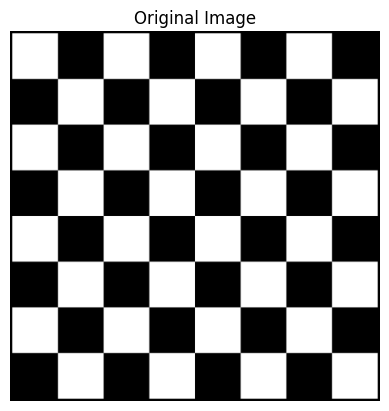

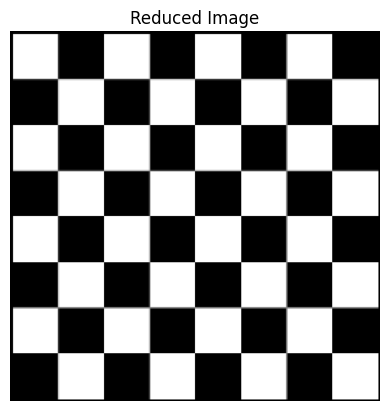

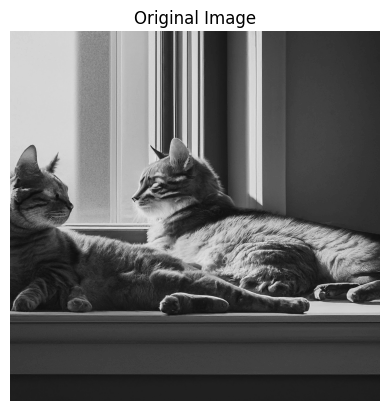

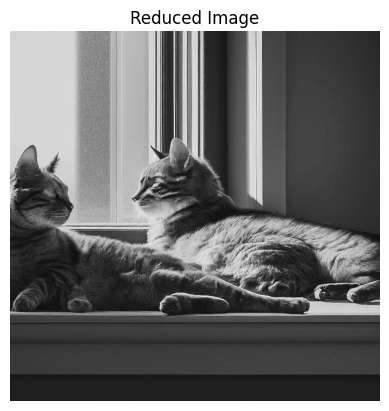

(1536, 1536)
(768, 768)


In [29]:
# reeduce an image by half of the numbeer of lines and columns
def reduce_image(image):
    return image[::2, ::2]

# apply the reduce_image function to the images
chess_image_reduced = reduce_image(chess_image)
# show original image and the reduced image with plt
plt.imshow(chess_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

plt.imshow(chess_image_reduced, cmap='gray')
plt.title("Reduced Image")
plt.axis('off')
plt.show()

# show original image and the reduced image of cats
plt.imshow(cat_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

cat_image_reduced = reduce_image(cat_image)
plt.imshow(cat_image_reduced, cmap='gray')
plt.title("Reduced Image")
plt.axis('off')
plt.show()

print(cat_image.shape)
print(cat_image_reduced.shape)

### 2- with suavization

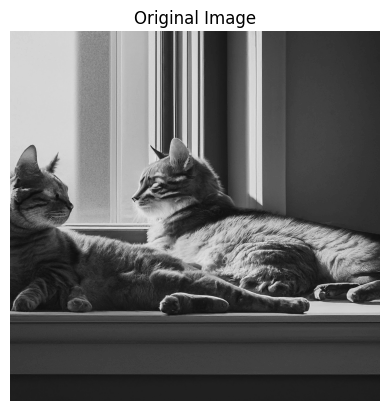

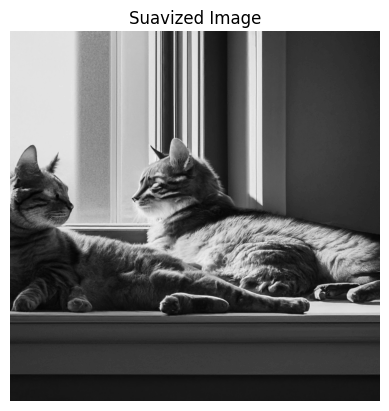

In [31]:
def suavize_and_cut(img):
    img = cv2.GaussianBlur(img, (5, 5), 0)
    img = img[::2, ::2]
    return img

# apply the suavize_and_cut function to the images
cat_image_suavized = suavize_and_cut(cat_image)

plt.imshow(cat_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

plt.imshow(cat_image_suavized, cmap='gray')
plt.title("Suavized Image")
plt.axis('off')
plt.show()


### 5 - Extra

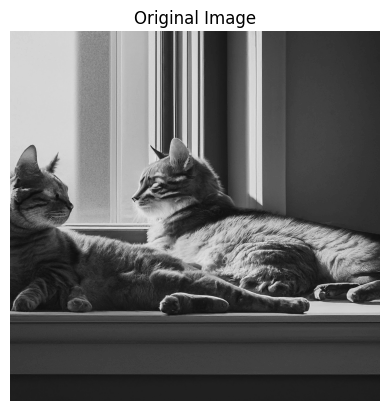

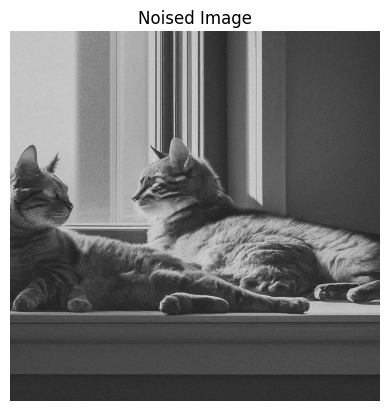

In [55]:
# add gaussian noise to the image
def add_gaussian_noise(img, mean=-0.9, std=10):
    noise = np.random.normal(mean, std, img.shape)
    return img + noise

# apply the add_gaussian_noise function to the images
cat_image_noised = add_gaussian_noise(cat_image)

plt.imshow(cat_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

plt.imshow(cat_image_noised, cmap='gray')
plt.title("Noised Image")
plt.axis('off')
plt.show()

